Results Summary:
   K-Value  Fold Size  Mean Anomaly Score  Anomalies Detected
0        3          5            0.247530                 715
1        3         10            0.240952                 720
2        3         15            0.238799                 720
3        5          5            0.272048                 715
4        5         10            0.264764                 720
5        5         15            0.262361                 720
6        7          5            0.290890                 715
7        7         10            0.283080                 720
8        7         15            0.280443                 720


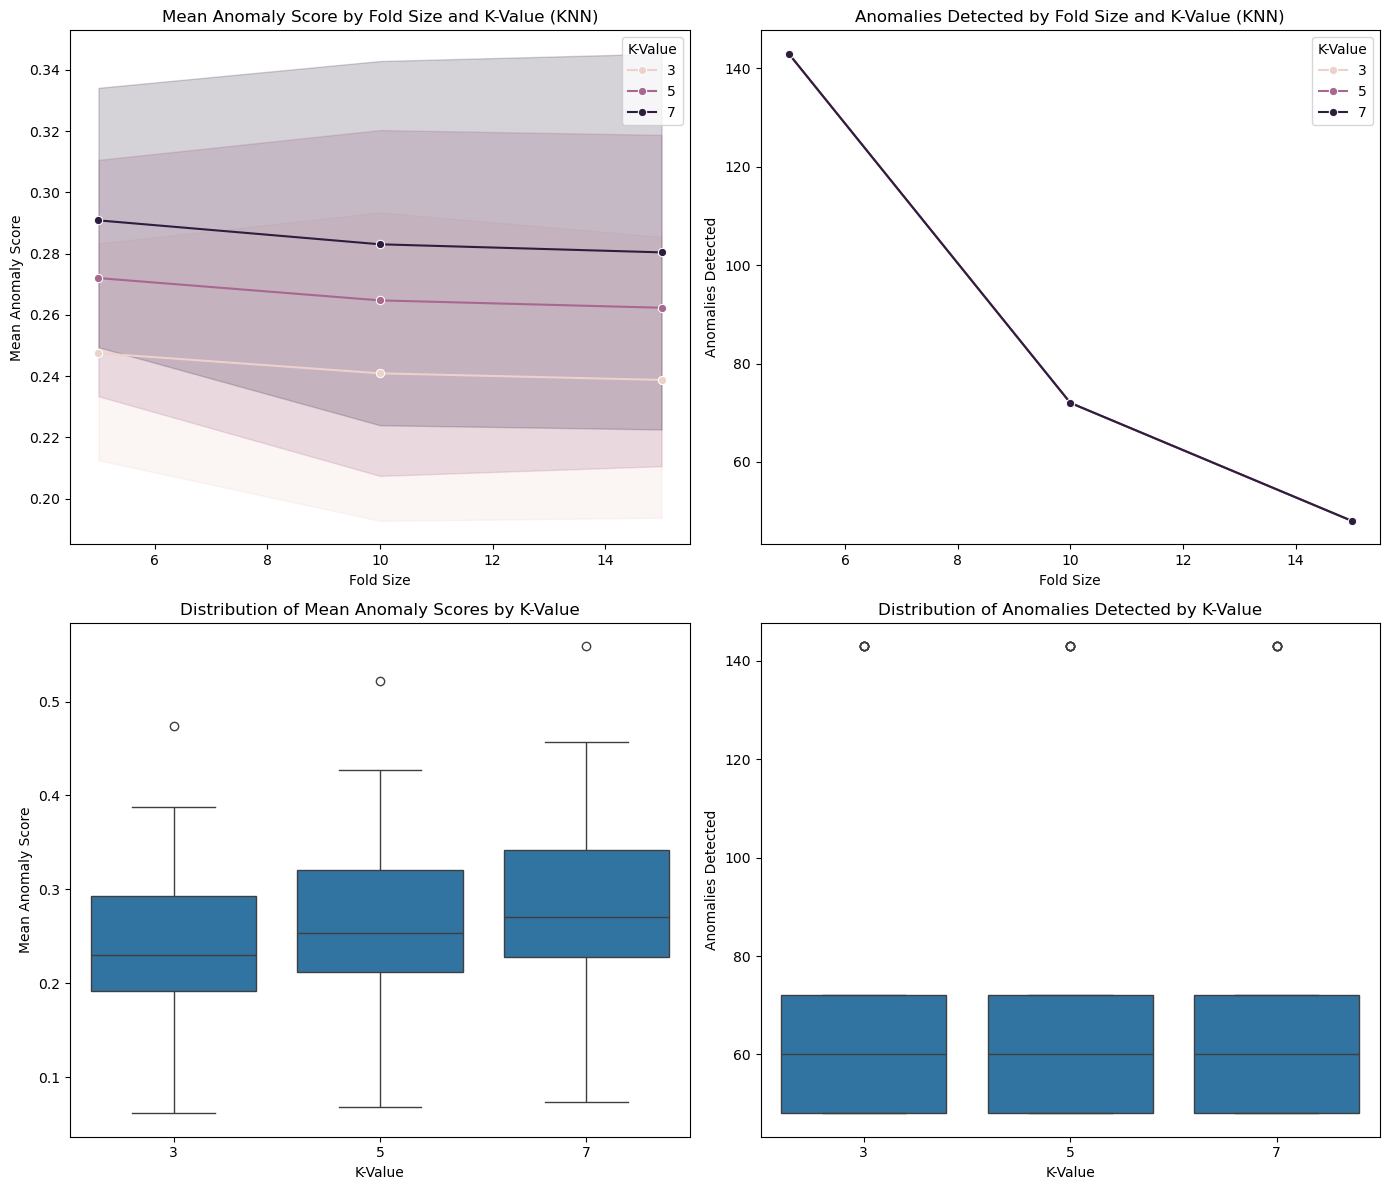


Conclusions:
1. The Mean Anomaly Score generally varies with different K-values, with higher K-values showing more consistency across fold sizes.
2. The number of anomalies detected is higher with larger fold sizes and lower K-values, suggesting that smaller K-values may be more sensitive to outliers.
3. From the boxplot, we observe that the distribution of mean anomaly scores is more consistent for K=5 and K=7, while K=3 shows greater variability.
4. Overall, KNN with a balanced K-value, like 5, might provide reliable anomaly detection performance with fewer false positives.


In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
k_values = [3, 5, 7]  # Different k-values to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'K-Value': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate KNN using K-Fold Cross-Validation
def cross_validate_knn(k_value, fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = KNeighborsClassifier(n_neighbors=k_value)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train, np.zeros(len(X_train)))  # Fit with dummy labels
        distances, _ = model.kneighbors(X_test)

        # Calculate anomaly scores and predictions
        mean_distance = distances.mean(axis=1)
        anomalies = mean_distance > np.percentile(mean_distance, 95)  # Top 5% as anomalies

        # Store results
        results['Model'].append('KNN')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['K-Value'].append(k_value)
        results['Mean Anomaly Score'].append(mean_distance.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on KNN with varying fold sizes and k-values
for k_value in k_values:
    for fold_size in fold_sizes:
        cross_validate_knn(k_value, fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
summary = results_df.groupby(['K-Value', 'Fold Size']).agg({
    'Mean Anomaly Score': 'mean',
    'Anomalies Detected': 'sum'
}).reset_index()
print("Results Summary:")
print(summary)

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 12))

# Plot Mean Anomaly Scores by Fold Size and K-Value
plt.subplot(2, 2, 1)
sns.lineplot(data=results_df, x='Fold Size', y='Mean Anomaly Score', hue='K-Value', marker='o')
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Mean Anomaly Score by Fold Size and K-Value (KNN)")
plt.legend(title="K-Value")

# Plot Anomalies Detected by Fold Size and K-Value
plt.subplot(2, 2, 2)
sns.lineplot(data=results_df, x='Fold Size', y='Anomalies Detected', hue='K-Value', marker='o')
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Anomalies Detected by Fold Size and K-Value (KNN)")
plt.legend(title="K-Value")

# Boxplot of Mean Anomaly Scores by K-Value
plt.subplot(2, 2, 3)
sns.boxplot(data=results_df, x='K-Value', y='Mean Anomaly Score')
plt.title("Distribution of Mean Anomaly Scores by K-Value")
plt.xlabel("K-Value")
plt.ylabel("Mean Anomaly Score")

# Boxplot of Anomalies Detected by K-Value
plt.subplot(2, 2, 4)
sns.boxplot(data=results_df, x='K-Value', y='Anomalies Detected')
plt.title("Distribution of Anomalies Detected by K-Value")
plt.xlabel("K-Value")
plt.ylabel("Anomalies Detected")

plt.tight_layout()
plt.show()

# Conclusion
print("\nConclusions:")
print("1. The Mean Anomaly Score generally varies with different K-values, with higher K-values showing more consistency across fold sizes.")
print("2. The number of anomalies detected is higher with larger fold sizes and lower K-values, suggesting that smaller K-values may be more sensitive to outliers.")
print("3. From the boxplot, we observe that the distribution of mean anomaly scores is more consistent for K=5 and K=7, while K=3 shows greater variability.")
print("4. Overall, KNN with a balanced K-value, like 5, might provide reliable anomaly detection performance with fewer false positives.")


Results Summary:
   Fold Size  Mean Anomaly Score  Anomalies Detected
0          5            0.160307               143.0
1         10            0.159552                72.0
2         15            0.159005                48.0


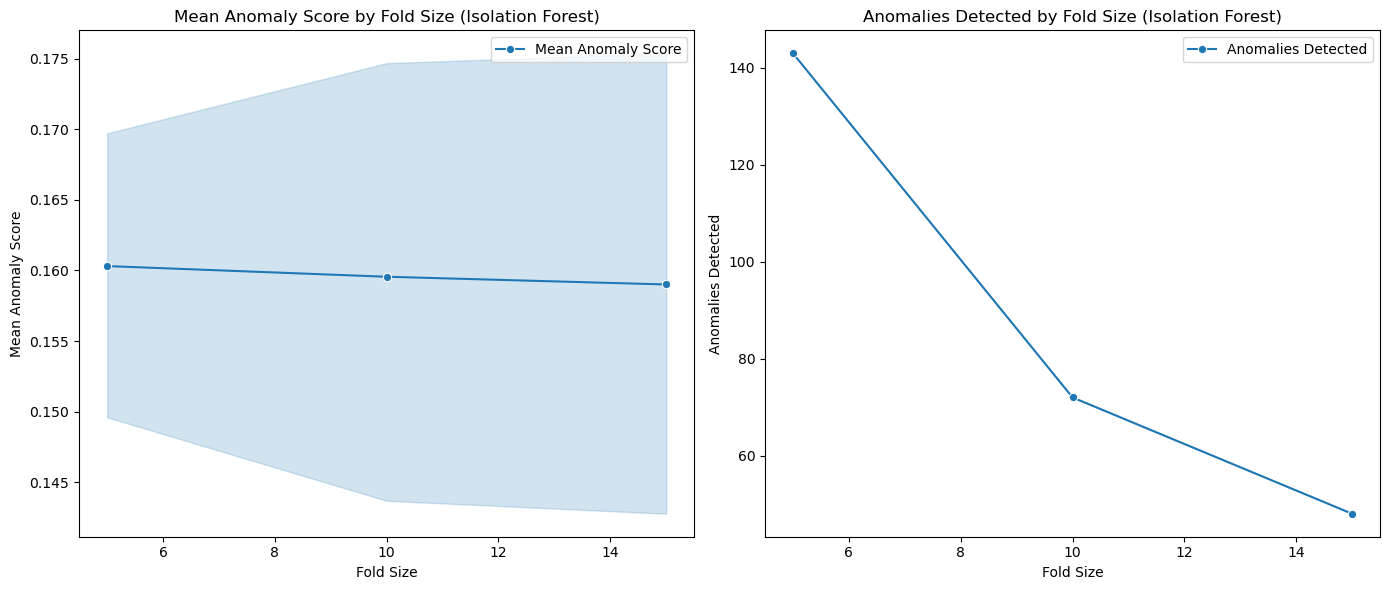

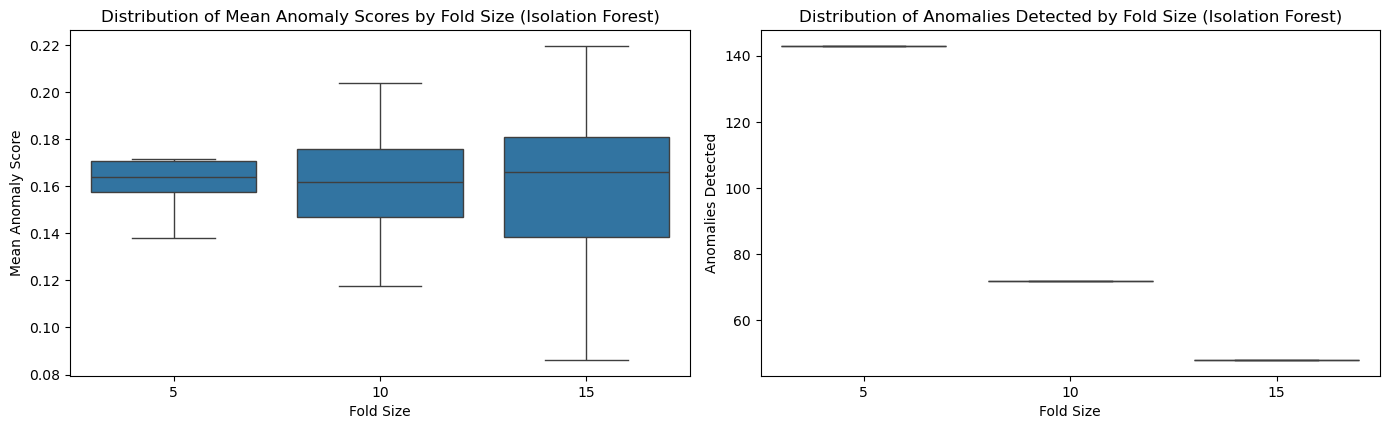

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate Isolation Forest using K-Fold Cross-Validation
def cross_validate_isolation_forest(fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = IsolationForest(contamination=0.05)  # Adjust contamination level as needed

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train)
        scores = model.decision_function(X_test)  # Higher scores mean more normal, lower means more anomalous
        anomalies = scores < np.percentile(scores, 5)  # Top 5% as anomalies

        # Store results
        results['Model'].append('Isolation Forest')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Mean Anomaly Score'].append(scores.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on Isolation Forest with varying fold sizes
for fold_size in fold_sizes:
    cross_validate_isolation_forest(fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
sns.lineplot(data=results_df, x='Fold Size', y='Mean Anomaly Score', marker='o', label="Mean Anomaly Score")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Mean Anomaly Score by Fold Size (Isolation Forest)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
sns.lineplot(data=results_df, x='Fold Size', y='Anomalies Detected', marker='o', label="Anomalies Detected")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Anomalies Detected by Fold Size (Isolation Forest)")

plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Fold Size
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Fold Size', y='Mean Anomaly Score')
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Fold Size (Isolation Forest)")

# Distribution of Anomalies Detected by Fold Size
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Fold Size', y='Anomalies Detected')
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Fold Size (Isolation Forest)")

plt.tight_layout()
plt.show()


Results Summary:
   Gamma  Fold Size  Mean Anomaly Score  Anomalies Detected
0   auto          5            0.806357               143.0
1   auto         10            0.883208                72.0
2   auto         15            0.920616                48.0
3  scale          5            0.741630               143.0
4  scale         10            0.816564                72.0
5  scale         15            0.847973                48.0


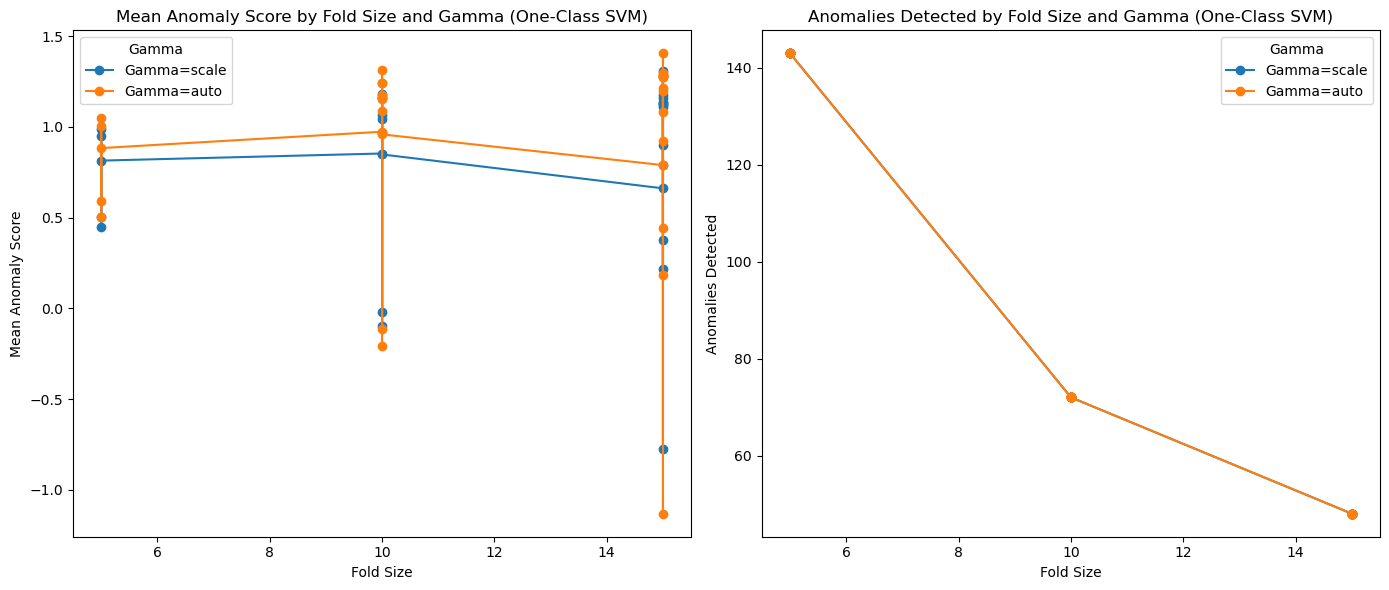

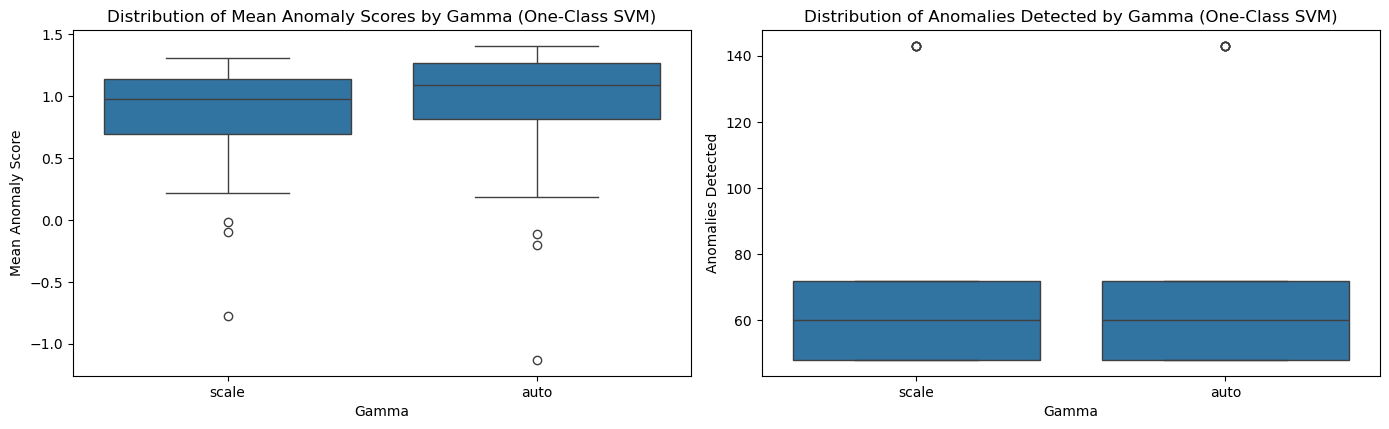

In [15]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
gamma_values = ['scale', 'auto']  # Different gamma values to test for One-Class SVM

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Gamma': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate One-Class SVM using K-Fold Cross-Validation
def cross_validate_one_class_svm(gamma, fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = OneClassSVM(kernel='rbf', gamma=gamma, nu=0.05)  # nu sets the expected proportion of outliers

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train)
        scores = model.decision_function(X_test)  # Higher scores mean more normal, lower means more anomalous
        anomalies = scores < np.percentile(scores, 5)  # Top 5% as anomalies

        # Store results
        results['Model'].append('One-Class SVM')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Gamma'].append(gamma)
        results['Mean Anomaly Score'].append(scores.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on One-Class SVM with varying fold sizes and gamma values
for gamma in gamma_values:
    for fold_size in fold_sizes:
        cross_validate_one_class_svm(gamma, fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Gamma', 'Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for gamma in results_df['Gamma'].unique():
    subset = results_df[results_df['Gamma'] == gamma]
    plt.plot(subset['Fold Size'], subset['Mean Anomaly Score'], marker='o', label=f"Gamma={gamma}")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.legend(title="Gamma")
plt.title("Mean Anomaly Score by Fold Size and Gamma (One-Class SVM)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for gamma in results_df['Gamma'].unique():
    subset = results_df[results_df['Gamma'] == gamma]
    plt.plot(subset['Fold Size'], subset['Anomalies Detected'], marker='o', label=f"Gamma={gamma}")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.legend(title="Gamma")
plt.title("Anomalies Detected by Fold Size and Gamma (One-Class SVM)")







plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Gamma
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Gamma', y='Mean Anomaly Score')
plt.xlabel("Gamma")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Gamma (One-Class SVM)")

# Distribution of Anomalies Detected by Gamma
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Gamma', y='Anomalies Detected')
plt.xlabel("Gamma")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Gamma (One-Class SVM)")

plt.tight_layout()
plt.show()
